# Deep Learning for Advanced Object Detection

### Install Required Packages

In [82]:
!pip install labelme tensorflow opencv-python matplotlib albumentations pandas Pillow requests


### Import packages

In [83]:
import os
import time
import uuid
import cv2
import tensorflow as tf
import json
import numpy as np
from matplotlib import pyplot as plt
import albumentations as alb
import matplotlib.pyplot as plt
from PIL import Image
import requests
from io import BytesIO
import base64

## 1. Collecting Primary Data/Images Using OpenCV

Hello! Capturing images using the code below is purely optional. You can skip this part, and proceed to the Augmentation pipeline, which has a link to this projects images. Here, you can load these images, and augment them, and they should be stored within this notebook.

#### Disregard if not capturing images! 

Before running the code below you need to create a folder where you can store the images you intend to capture below. Currently, an example path is in place below, but under the "img_path" variable you'll need to specify your own unique path. Further, within the folder that will store your capture images there also needs to be folder, which you can call "labels". This folder will be paramount for the data annotation stage that comes after capturing the images!

In [3]:
img_path = 'IMG_PATH_HERE' #Specify your img_path here
number_images = 33 #Select number of images you want

In [36]:
cap = cv2.VideoCapture(0) #If the video camera does not open try to change the number within "VideoCapture(HERE)"
for imgnum in range(number_images):
    print('Collecting image {}'.format(imgnum))
    ret, frame = cap.read()
    imgname = os.path.join(img_path,f'{str(uuid.uuid1())}.jpg')
    cv2.imwrite(imgname, frame)
    cv2.imshow('frame', frame)
    time.sleep(1) #Can be changed to allow more time

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
        
cap.release()
cv2.destroyAllWindows()

### 1.2 Label your images using LabelMe

After you've captured your images, and stored them in your image folder run the code below. Labelme, which is our preferred annotation library will open a new screen. When you get to its UI a few key decisions need to be made:


#### Labelme Guidelines


##### Step 1:
After running "!labelme" a new window will open up, and the first thing you need to do is open up the "image" folder created earlier. To do so, click "file" in the top left corner, and proceed with selecting "Open Dir". Step 2 below will expand on next steps.

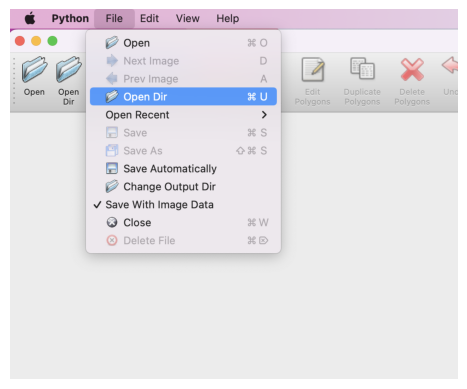

In [14]:
#Step 1
url_1 = 'https://drive.google.com/uc?export=download&id=1zTI_iOd6JPB16tW7UDWTRPGTR81Tg71T'
# Get the content of the image
response = requests.get(url_1)
img = Image.open(BytesIO(response.content))

# Display the image
plt.imshow(img)
plt.axis('off')  # Turn off axis numbers and ticks
plt.show()

##### Step 2:
After opening up an "Open Dir" in step 1 we need to select the folder, which contains our images. In our case the folder would look something like below:

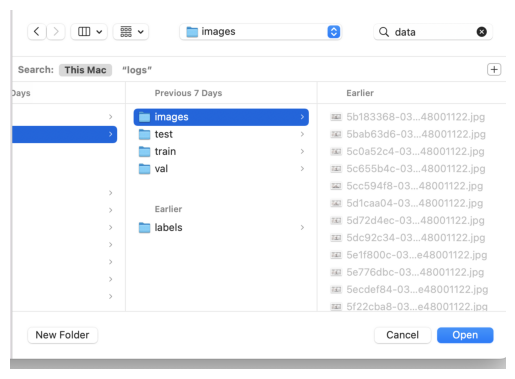

In [15]:
#Step 1
url_2 = 'https://drive.google.com/uc?export=download&id=1S_AcObD2f2yhUX25CzT9msL-6v1KLqf-'
# Get the content of the image
response = requests.get(url_2)
img = Image.open(BytesIO(response.content))

# Display the image
plt.imshow(img)
plt.axis('off')  # Turn off axis numbers and ticks
plt.show()

##### Step 3: Output from Step 1 & 2

After completing step 1 & 2 your images from the "image" folder should be displayed in the "File List" in the bottom right side of the user inter face. You can click on any image and maneuver back and forth between images by clicking either "a" or "d"!

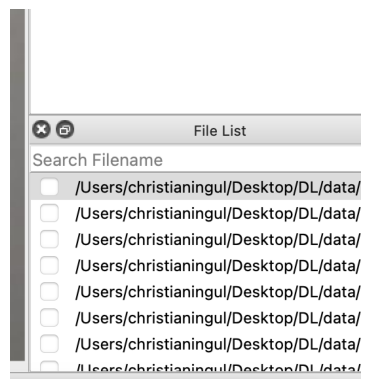

In [16]:
#Step 3
url_3 = 'https://drive.google.com/uc?export=download&id=1YSrL4OcW1buCe0dxS9iQ_yaawDo9Vgcg'
# Get the content of the image
response = requests.get(url_3)
img = Image.open(BytesIO(response.content))

# Display the image
plt.imshow(img)
plt.axis('off')  # Turn off axis numbers and ticks
plt.show()

##### Step 4: 

The next thing you would want to do is click "file" again in the top left corner. Then proceed to select the output directory, which should be your "labels" folder, which is under the same folder as your image folder. This step will allow us to automatically save our annotations in the "labels" folder!

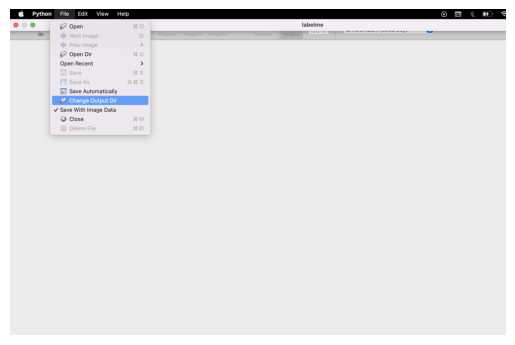

In [17]:
#Step 1
url_4 = 'https://drive.google.com/uc?export=download&id=1SZH9twahHwXKcfhqncBhuDHCVo-ff3Pg'
# Get the content of the image
response = requests.get(url_4)
img = Image.open(BytesIO(response.content))

# Display the image
plt.imshow(img)
plt.axis('off')  # Turn off axis numbers and ticks
plt.show()

##### Step 5: 
After specifying the output directory click "Save Automatically" under file again, which will allow your annotations to automatically be saved in the "labels" folder.

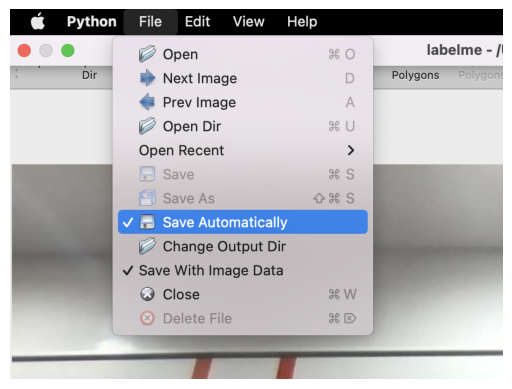

In [18]:
url_5 = 'https://drive.google.com/uc?export=download&id=1WuoAQw_p7PeSKOpncXMeZVQugN33h7ga'

# Get the content of the image
response = requests.get(url_5)
img = Image.open(BytesIO(response.content))

# Display the image
plt.imshow(img)
plt.axis('off')  # Turn off axis numbers and ticks
plt.show()

##### Step 6:
Now it is time to create our annotations and bounding boxes. Select any image in your file list, and then Right-click the image and a menu will emerge. This menu should include "Create Rectangle" like below:

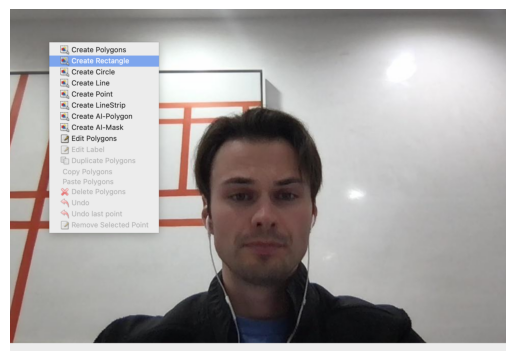

In [19]:
url_6 = 'https://drive.google.com/uc?export=download&id=1-3LsIuM9ht64bsZKELuvJnB-BjmkIFlC'

# Get the content of the image
response = requests.get(url_6)
img = Image.open(BytesIO(response.content))

# Display the image
plt.imshow(img)
plt.axis('off')  # Turn off axis numbers and ticks
plt.show()

##### Step 7:
After clicking "Create Rectangle" we can now manually draw the bounding box. It is straightforward: 1. Select the starting point of your bounding box "Top left" and then specify the "Bottom Right" ending point

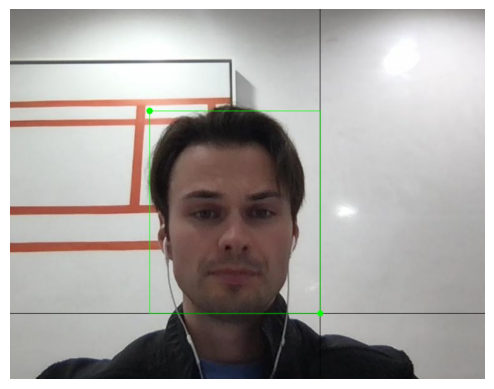

In [20]:
url_7 = 'https://drive.google.com/uc?export=download&id=1iSCtXaOLKYpF085qoKYEcO8NNCdTHtyB'
# Get the content of the image
response = requests.get(url_7)
img = Image.open(BytesIO(response.content))

# Display the image
plt.imshow(img)
plt.axis('off')  # Turn off axis numbers and ticks
plt.show()

##### Step 8: Label the Image

The last step is to label the image after drawing the bounding box. A table will emerge after you specify the top left and bottom right bounding box coordinates. Type in the top display box the name of the class and then "ok". This will create a json file in your "labels" folder with the bounding box coordinates and name of the class in the image!


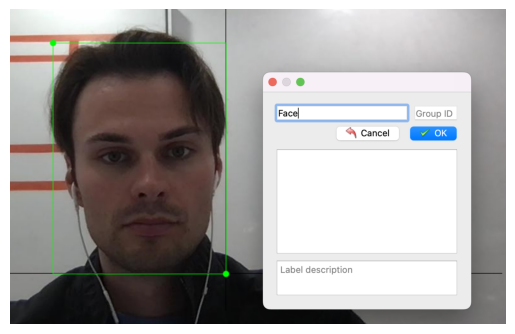

In [23]:
url_8 = 'https://drive.google.com/uc?export=download&id=1c9etOlzQb8LPxf5YAVJH4hwpFk1MhEu0'
# Get the content of the image
response = requests.get(url_8)
img = Image.open(BytesIO(response.content))

# Display the image
plt.imshow(img)
plt.axis('off')  # Turn off axis numbers and ticks
plt.show()

### Run LabelMe

The process above should allow you to manually annotate your images. Run the "!labelme" below and try it yourself.

In [21]:
!labelme # a & d allows you to go back and forth

2024-04-28 16:35:06,665 [INFO   ] __init__:get_config:67- Loading config file from: /Users/christianingul/.labelmerc
2024-04-28 16:35:14.731 Python[91595:1713529] -[NSNull length]: unrecognized selector sent to instance 0x7ff849c400c0
2024-04-28 16:35:14.732 Python[91595:1713529] Exception calling directoryDidChange: on delegate <QNSOpenSavePanelDelegate: 0x600001821f80> exception=-[NSNull length]: unrecognized selector sent to instance 0x7ff849c400c0
2024-04-28 16:35:14.739 Python[91595:1713529] -[NSNull length]: unrecognized selector sent to instance 0x7ff849c400c0
2024-04-28 16:35:14.739 Python[91595:1713529] Exception calling directoryDidChange: on delegate <QNSOpenSavePanelDelegate: 0x600001821f80> exception=-[NSNull length]: unrecognized selector sent to instance 0x7ff849c400c0
2024-04-28 16:35:14.752 Python[91595:1713529] -[NSNull length]: unrecognized selector sent to instance 0x7ff849c400c0
2024-04-28 16:35:14.752 Python[91595:1713529] Exception calling directoryDidChange: on 

### OPTIONAL: Load your images into a Tensorflow Data Pipeline

Here you need to specify your "image" folder path to be able to load in the images.

In [35]:
images = tf.data.Dataset.list_files('new_venv/data/images/*.jpg') #*.jpg allows us to do a wild card search
#We also convert our images into a TensorFlow 'Dataset' object that is designed to work with a large collection of image files efficiently

In [85]:
def load_image(x): #This function decodes the JPEG-encoded image stored in the string tensor byte_img into a tensor that TensorFlow can work with. The output is a 3-D tensor representing the image. 
    byte_img = tf.io.read_file(x)
    img = tf.io.decode_jpeg(byte_img)
    return img

#images = images.map(load_image) #.map() applies this function to each image 

### IGNORE IF YOU LOADED IN IMAGES FROM GITHUB: Split data into training, validation and testing folders
Here, you will need to add new folders in your directory. Create a train, val and test folder where each folder has two subfolders "images" & "labels". Subsequently, you need to manually move our images from the "image" folder to train, val and testing folders. You can define the split. Our group used a 70%, 14% and 16% split. After the images have been moved to their new folders we can move on to a code, which will automatically move your labels files to train, test and val folders. The new structure should look something like the image below

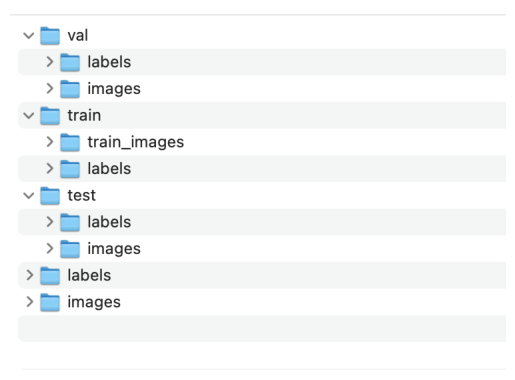

In [86]:
url_9 = 'https://drive.google.com/uc?export=download&id=1noRUF_0-0P7Qximon55ykBcvQ6J9nKwg'
# Get the content of the image
response = requests.get(url_9)
img = Image.open(BytesIO(response.content))

# Display the image
plt.imshow(img)
plt.axis('off')  # Turn off axis numbers and ticks
plt.show()

### Code to move the matching labels to matching images
If you completed the step above you can run the code below. The code automatically matches your labels with the corresponding image in either train, test, or val!

In [38]:
import os 

for folder in ['train', 'test', 'val']:
    image_folder = os.path.join('SPECIFY YOUR PATH HERE', folder, 'images') 
    for file in os.listdir(image_folder):
        # print(file)
        
        filename = file.split('.')[0] + '.json'
        # print(filename)
        existing_filepath = os.path.join('SPECIFY YOUR PATH HERE', 'labels', filename)
        print(existing_filepath)
        
        if os.path.exists(existing_filepath): 
            print('Executing')
            new_filepath = os.path.join('SPECIFY YOUR PATH HERE', folder, 'labels', filename)
            print(new_filepath)
            
            os.replace(existing_filepath, new_filepath)

FileNotFoundError: [Errno 2] No such file or directory: 'DL/data/train/images'

## Image Augmentation - Using Albumentations
Now it is time to augment our images! Run the code below to set up our intended augmentations

In [69]:
img_augmentor = alb.Compose([
                         alb.HorizontalFlip(p=0.5), 
                         alb.RandomBrightnessContrast(p=0.2),
                         alb.RandomGamma(p=0.2), 
                         alb.RGBShift(p=0.2), 
                         alb.VerticalFlip(p=0.5)], 
                       bbox_params=alb.BboxParams(format='albumentations', label_fields=['class_labels']))  

In [87]:
#Defining a dictionary, which will later be used to convert names to integers
class_labels = {
    'sharon': 0,
    'adi': 1,
    'christian': 2,
    'none': 3  # Using this for cases with no detected face
}


## Creating an Augmentation Pipeline

### IGNORE IF LOADED IN IMAGES FROM GITHUB: Folders for Augmentation Pipeline.
We now need to prepare new folders for the Augmentation pipeline. Please create new folders like the image showcases below:

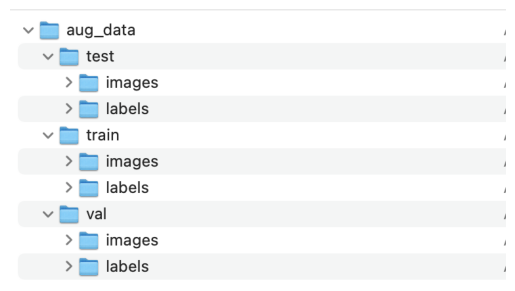

In [71]:
url_10 = 'https://drive.google.com/uc?export=download&id=1HpuE6vF_2d0slHMkwF2MnsypZBM3BX5a'
# Get the content of the image
response = requests.get(url_10)
img = Image.open(BytesIO(response.content))

# Display the image
plt.imshow(img)
plt.axis('off')  # Turn off axis numbers and ticks
plt.show()

NOTE: the code below will automatically generate augmented images, however, it assumes that you have four classes: 'Face 1', 'Face 2', 'Face 3', 'No Face'. If your annotated images differ you will have to change the code!

In [156]:
for partition in ['train', 'test', 'val']:
    image_folder = os.path.join('SPECIFY YOUR PATH HERE', partition, 'images')
    for image in os.listdir(image_folder):
        img = cv2.imread(os.path.join(image_folder, image))
        if img is None:
            continue  # Skip if the image is not loaded properly

        coords = [0, 0, 0.00001, 0.00001]  # Default coordinates
        label_path = os.path.join('SPECIFY YOUR PATH HERE', partition, 'labels', f'{image.split(".")[0]}.json')
        class_label = 3  # Default class for no detected face

        if os.path.exists(label_path):
            with open(label_path, 'r') as f:
                label = json.load(f)
            if label['shapes']:  # Check if there are any annotations
                coords = [label['shapes'][0]['points'][0][0], label['shapes'][0]['points'][0][1],
                          label['shapes'][0]['points'][1][0], label['shapes'][0]['points'][1][1]]
                coords = list(np.divide(coords, [1280, 720, 1280, 720]))  # Normalize coordinates
                class_label = class_labels[label['shapes'][0]['label']]  # Convert string label to integer

        try:
            for x in range(60):  # Augment each image 60 times
                augmented = img_augmentor(image=img, bboxes=[coords], class_labels=[[class_label]])  # Ensure class label is integer
                cv2.imwrite(os.path.join('SPECIFY YOUR NEW AUG DATA PATH HERE', partition, 'images', 
                                         f'{image.split(".")[0]}.{x}.jpg'), augmented['image'])

                annotation = {'image': f'{image.split(".")[0]}.{x}.jpg'}
                if len(augmented['bboxes']) > 0:
                    annotation['bbox'] = augmented['bboxes'][0]
                    annotation['class'] = augmented['class_labels'][0]  # Ensure correct indexing
                else:
                    annotation['bbox'] = [0, 0, 0, 0]
                    annotation['class'] = 3  # Use the integer for 'none'

                with open(os.path.join('SPECIFY YOUR NEW AUG DATA PATH HERE', partition, 'labels', 
                                       f'{image.split(".")[0]}.{x}.json'), 'w') as f:
                    json.dump(annotation, f)

        except Exception as e:
            print(e)


### Loading the newly created Augmented Images to our Tensorflow Dataset

In [88]:
train_images = tf.data.Dataset.list_files('/Users/christianingul/Desktop/DL/aug_data/train/images/*.jpg', shuffle=False)
train_images = train_images.map(load_image, num_parallel_calls=tf.data.experimental.AUTOTUNE)
train_images = train_images.map(lambda x: tf.image.resize(x, (224,224)), num_parallel_calls=tf.data.AUTOTUNE)  # Resizing the image to 224x224 to match MobileNetV2
train_images = train_images.map(lambda x: tf.ensure_shape(x / 255, (224, 224, 3)), num_parallel_calls=tf.data.AUTOTUNE)  # Normalizing images, so they are between 0 & 1


In [89]:
test_images = tf.data.Dataset.list_files('/Users/christianingul/Desktop/DL/aug_data/test/images/*.jpg', shuffle=False)
test_images = test_images.map(load_image,num_parallel_calls=tf.data.AUTOTUNE)
test_images = test_images.map(lambda x: tf.image.resize(x, (224,224)),num_parallel_calls=tf.data.AUTOTUNE)
test_images = test_images.map(lambda x: tf.ensure_shape(x / 255, (224, 224, 3)),num_parallel_calls=tf.data.AUTOTUNE)

In [90]:
val_images = tf.data.Dataset.list_files('/Users/christianingul/Desktop/DL/aug_data/val/images/*.jpg', shuffle=False)
val_images = val_images.map(load_image,num_parallel_calls=tf.data.AUTOTUNE)
val_images = val_images.map(lambda x: tf.image.resize(x, (224,224)),num_parallel_calls=tf.data.AUTOTUNE)
val_images = val_images.map(lambda x: tf.ensure_shape(x / 255, (224, 224, 3)),num_parallel_calls=tf.data.AUTOTUNE)

### Creating a Label Loading Function

In [91]:
def load_labels(label_path):
    # Convert the tensor to a numpy string within the TensorFlow graph
    label_path = label_path.numpy().decode("utf-8")
    
    with open(label_path, 'r', encoding="utf-8") as file:
        label_data = json.load(file)
        class_label = label_data['class']  #integers here
        bbox = label_data['bbox']

    # Convert class label and bbox to tensors
    class_label_tensor = tf.convert_to_tensor(class_label, dtype=tf.int32) #Converting integers to tensors
    bbox_tensor = tf.convert_to_tensor(bbox, dtype=tf.float32)

    return class_label_tensor, bbox_tensor


### Loading our Labels to the Tensorflow Dataset

In [92]:
def set_shapes(class_label, bbox): #Sets the shape of the Tensors
    class_label.set_shape([1]) #May need to be dynamic to account for 1-2 classes
    bbox.set_shape([4]) #Bounding box [x_min, y_min, x_max, y_max], hence shape 4,
    return class_label, bbox 

In [93]:
train_labels = tf.data.Dataset.list_files('/Users/christianingul/Desktop/DL/aug_data/train/labels/*.json', shuffle=False)
train_labels = train_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.int32, tf.float32]),
                                num_parallel_calls=tf.data.AUTOTUNE)

In [94]:
train_labels = train_labels.map(set_shapes,num_parallel_calls=tf.data.AUTOTUNE) #Sets the shape of the Tensors
#Bounding box [x_min, y_min, x_max, y_max], hence shape 4,

In [95]:
test_labels = tf.data.Dataset.list_files('/Users/christianingul/Desktop/DL/aug_data/test/labels/*.json', shuffle=False)
test_labels = test_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.int32, tf.float32]),
                              num_parallel_calls=tf.data.AUTOTUNE)
test_labels = test_labels.map(set_shapes,num_parallel_calls=tf.data.AUTOTUNE)


In [96]:
val_labels = tf.data.Dataset.list_files('/Users/christianingul/Desktop/DL/aug_data/val/labels/*.json', shuffle=False)
val_labels = val_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.int32, tf.float32]),
                            num_parallel_calls=tf.data.AUTOTUNE)
val_labels = val_labels.map(set_shapes,num_parallel_calls=tf.data.AUTOTUNE)


### Final dataset - Merging images & labels

In [97]:
train = tf.data.Dataset.zip((train_images, train_labels))
train = train.shuffle(5000)    # Shuffle the data
train = train.batch(10)         # Batch the data
train = train.prefetch(5)      # Prefetch 4 batches at a time to improve pipeline efficiency


In [98]:
train

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), (TensorSpec(shape=(None, 1), dtype=tf.int32, name=None), TensorSpec(shape=(None, 4), dtype=tf.float32, name=None)))>

In [99]:
test = tf.data.Dataset.zip((test_images, test_labels))
test = test.shuffle(1500)
test = test.batch(10)
test = test.prefetch(5)

In [100]:
test

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), (TensorSpec(shape=(None, 1), dtype=tf.int32, name=None), TensorSpec(shape=(None, 4), dtype=tf.float32, name=None)))>

In [101]:
val = tf.data.Dataset.zip((val_images, val_labels))
val = val.shuffle(1500)
val = val.batch(10)
val = val.prefetch(5)

In [102]:
val

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), (TensorSpec(shape=(None, 1), dtype=tf.int32, name=None), TensorSpec(shape=(None, 4), dtype=tf.float32, name=None)))>

### Deep Learning Modeling - MobileNetV2


In [103]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2


def build_model(input_shape=(224, 224, 3)):
    # Load MobileNetV2 without the top layer and set it to use ImageNet weights
    base_model = MobileNetV2(include_top=False, weights='imagenet', input_shape=input_shape)
    
    # Set the layers in the base model to be non-trainable (optional)
    for layer in base_model.layers:
        layer.trainable = False  # You can fine-tune this based on your needs

    # Create the feature extractor part
    base_features = GlobalAveragePooling2D()(base_model.output) #Works similar to a flattening layer

    # Add classification and bounding box heads
    x = Dense(1024, activation='relu', kernel_regularizer=l2(0.01))(base_features)
    x = Dropout(0.5)(x)
    class_output = Dense(4, activation='softmax', name='class_output')(x)

    y = Dense(1024, activation='relu',kernel_regularizer=l2(0.01))(base_features)
    y = Dropout(0.5)(y)
    bbox_output = Dense(4, activation='sigmoid', name='bbox_output')(y)

    # Construct the final model
    model = Model(inputs=base_model.input, outputs=[class_output, bbox_output])
    return model



### Loss Functions - Localization and Classification 

In [104]:
def localization_loss(y_true, yhat):            
    delta_coord = tf.reduce_sum(tf.square(y_true[:,:2] - yhat[:,:2])) #Look up reduce_sum again
    #delta coord looks at the first two elements of our bounding box, which is the left side x,y coordinates
    delta_coord_weighted = 1.5 * delta_coord
    
    #Finding the true height and width              
    h_true = y_true[:,3] - y_true[:,1] 
    w_true = y_true[:,2] - y_true[:,0] 

    #Finding the predicted height and width
    h_pred = yhat[:,3] - yhat[:,1] 
    w_pred = yhat[:,2] - yhat[:,0] 
    #Using the values above for our loss
    delta_size = tf.reduce_sum(tf.square(w_true - w_pred) + tf.square(h_true-h_pred))
    
    return delta_coord_weighted + delta_size

# Display Model Architecture

In [105]:
!pip install pydot

In [106]:
facetracker = build_model()

from keras.utils import plot_model
plot_model(facetracker, to_file='model_plot.png', show_shapes=True, show_layer_names=True)


You must install pydot (`pip install pydot`) for `plot_model` to work.


### Compiling & Training Model

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow import keras

# Define the model
facetracker = build_model()

# Compile the model
facetracker.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss={
        'class_output': 'sparse_categorical_crossentropy', #class_output, bbox_output
        'bbox_output': localization_loss
    },
    loss_weights={
        'class_output': 1.0,  # Normal weight for classification
        'bbox_output': 1.5   # Increased weight for bounding box regression
    },
    metrics={
        'class_output': ['accuracy'],
        'bbox_output': ['mse']
    })

logdir='logs'

callbacks_list = [
    keras.callbacks.EarlyStopping(
        monitor="val_bbox_output_mse",
        mode='min', #Consider changing to 'min' and monitoring mse
        patience=4
    ),
    tf.keras.callbacks.TensorBoard(log_dir='logs')
]



# Train the model
history = facetracker.fit(
    train,
    validation_data=val,
    epochs=40,
    callbacks=callbacks_list  # Add any callbacks like TensorBoard, ModelCheckpoint, etc.
)


Epoch 1/40


2024-04-28 22:32:10.626136: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:35: Filling up shuffle buffer (this may take a while): 2516 of 5000
2024-04-28 22:32:19.947708: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


420/420 ━━━━━━━━━━━━━━━━━━━━ 241s 458ms/step - bbox_output_mse: 0.0494 - class_output_accuracy: 0.8692 - loss: 23.8024 - val_bbox_output_mse: 0.0480 - val_class_output_accuracy: 0.8856 - val_loss: 16.7359
Epoch 2/40


2024-04-28 22:35:44.051907: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:35: Filling up shuffle buffer (this may take a while): 2574 of 5000
2024-04-28 22:35:51.443124: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


420/420 ━━━━━━━━━━━━━━━━━━━━ 243s 536ms/step - bbox_output_mse: 0.0180 - class_output_accuracy: 0.9978 - loss: 13.6655 - val_bbox_output_mse: 0.0450 - val_class_output_accuracy: 0.8956 - val_loss: 12.1775
Epoch 3/40


2024-04-28 22:39:46.707215: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:35: Filling up shuffle buffer (this may take a while): 1376 of 5000
2024-04-28 22:39:56.707484: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:35: Filling up shuffle buffer (this may take a while): 2493 of 5000
2024-04-28 22:40:12.402839: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


420/420 ━━━━━━━━━━━━━━━━━━━━ 0s 478ms/step - bbox_output_mse: 0.0115 - class_output_accuracy: 0.9985 - loss: 9.5599

2024-04-28 22:43:43.814779: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:43: Filling up shuffle buffer (this may take a while): 826 of 1500
2024-04-28 22:43:45.235177: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


420/420 ━━━━━━━━━━━━━━━━━━━━ 296s 619ms/step - bbox_output_mse: 0.0115 - class_output_accuracy: 0.9985 - loss: 9.5583 - val_bbox_output_mse: 0.0427 - val_class_output_accuracy: 0.9167 - val_loss: 9.6183
Epoch 4/40


2024-04-28 22:44:43.254894: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:35: Filling up shuffle buffer (this may take a while): 949 of 5000
2024-04-28 22:45:03.240215: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:35: Filling up shuffle buffer (this may take a while): 2555 of 5000
2024-04-28 22:45:13.256332: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:35: Filling up shuffle buffer (this may take a while): 3122 of 5000
2024-04-28 22:45:23.420087: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:35: Filling up shuffle buffer (this may take a while): 3797 of 5000
2024-04-28 22:45:35.569168: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


420/420 ━━━━━━━━━━━━━━━━━━━━ 0s 710ms/step - bbox_output_mse: 0.0082 - class_output_accuracy: 0.9991 - loss: 7.1719

2024-04-28 22:50:45.143719: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:43: Filling up shuffle buffer (this may take a while): 766 of 1500
2024-04-28 22:50:47.601653: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


420/420 ━━━━━━━━━━━━━━━━━━━━ 427s 866ms/step - bbox_output_mse: 0.0082 - class_output_accuracy: 0.9991 - loss: 7.1708 - val_bbox_output_mse: 0.0425 - val_class_output_accuracy: 0.9156 - val_loss: 7.9485
Epoch 5/40


2024-04-28 22:52:05.342130: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:35: Filling up shuffle buffer (this may take a while): 664 of 5000
2024-04-28 22:52:25.329352: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:35: Filling up shuffle buffer (this may take a while): 2284 of 5000
2024-04-28 22:52:35.349917: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:35: Filling up shuffle buffer (this may take a while): 3095 of 5000
2024-04-28 22:52:50.967333: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


420/420 ━━━━━━━━━━━━━━━━━━━━ 419s 828ms/step - bbox_output_mse: 0.0060 - class_output_accuracy: 0.9988 - loss: 5.5706 - val_bbox_output_mse: 0.0424 - val_class_output_accuracy: 0.9389 - val_loss: 6.6603
Epoch 6/40


2024-04-28 22:58:50.258226: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:35: Filling up shuffle buffer (this may take a while): 767 of 5000
2024-04-28 22:59:10.310786: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:35: Filling up shuffle buffer (this may take a while): 2543 of 5000
2024-04-28 22:59:20.419597: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:35: Filling up shuffle buffer (this may take a while): 3347 of 5000
2024-04-28 22:59:26.429981: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


420/420 ━━━━━━━━━━━━━━━━━━━━ 331s 675ms/step - bbox_output_mse: 0.0049 - class_output_accuracy: 0.9990 - loss: 4.4059 - val_bbox_output_mse: 0.0390 - val_class_output_accuracy: 0.9167 - val_loss: 5.5905
Epoch 7/40


2024-04-28 23:04:20.712470: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:35: Filling up shuffle buffer (this may take a while): 1501 of 5000
2024-04-28 23:04:30.747705: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:35: Filling up shuffle buffer (this may take a while): 2629 of 5000
2024-04-28 23:04:43.335548: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


420/420 ━━━━━━━━━━━━━━━━━━━━ 295s 624ms/step - bbox_output_mse: 0.0041 - class_output_accuracy: 0.9990 - loss: 3.5067 - val_bbox_output_mse: 0.0409 - val_class_output_accuracy: 0.9333 - val_loss: 4.9425
Epoch 8/40


2024-04-28 23:09:15.673802: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:35: Filling up shuffle buffer (this may take a while): 1277 of 5000
2024-04-28 23:09:35.653015: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:35: Filling up shuffle buffer (this may take a while): 3387 of 5000
2024-04-28 23:09:42.058124: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


420/420 ━━━━━━━━━━━━━━━━━━━━ 0s 529ms/step - bbox_output_mse: 0.0036 - class_output_accuracy: 0.9980 - loss: 2.8154

2024-04-28 23:13:34.618746: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:43: Filling up shuffle buffer (this may take a while): 855 of 1500
2024-04-28 23:13:35.001383: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


420/420 ━━━━━━━━━━━━━━━━━━━━ 316s 666ms/step - bbox_output_mse: 0.0036 - class_output_accuracy: 0.9980 - loss: 2.8151 - val_bbox_output_mse: 0.0396 - val_class_output_accuracy: 0.9178 - val_loss: 4.3785
Epoch 9/40


2024-04-28 23:14:32.059423: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:35: Filling up shuffle buffer (this may take a while): 1474 of 5000
2024-04-28 23:14:42.071015: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:35: Filling up shuffle buffer (this may take a while): 2820 of 5000
2024-04-28 23:14:52.071201: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:35: Filling up shuffle buffer (this may take a while): 3867 of 5000
2024-04-28 23:14:54.869540: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


420/420 ━━━━━━━━━━━━━━━━━━━━ 280s 588ms/step - bbox_output_mse: 0.0034 - class_output_accuracy: 0.9994 - loss: 2.2452 - val_bbox_output_mse: 0.0408 - val_class_output_accuracy: 0.9167 - val_loss: 3.9660
Epoch 10/40


2024-04-28 23:19:12.332408: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:35: Filling up shuffle buffer (this may take a while): 707 of 5000
2024-04-28 23:19:22.342302: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:35: Filling up shuffle buffer (this may take a while): 1798 of 5000
2024-04-28 23:19:32.358041: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:35: Filling up shuffle buffer (this may take a while): 2361 of 5000
2024-04-28 23:19:52.333058: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:35: Filling up shuffle buffer (this may take a while): 4073 of 5000
2024-04-28 23:19:54.164423: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


420/420 ━━━━━━━━━━━━━━━━━━━━ 341s 687ms/step - bbox_output_mse: 0.0030 - class_output_accuracy: 0.9990 - loss: 1.7923 - val_bbox_output_mse: 0.0372 - val_class_output_accuracy: 0.9167 - val_loss: 3.4535
Epoch 11/40


2024-04-28 23:24:53.099862: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:35: Filling up shuffle buffer (this may take a while): 1764 of 5000
2024-04-28 23:25:11.299751: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


420/420 ━━━━━━━━━━━━━━━━━━━━ 0s 494ms/step - bbox_output_mse: 0.0029 - class_output_accuracy: 0.9990 - loss: 1.4541

### Evaluate model on the testing set

In [ ]:
test_metrics = facetracker.evaluate(test, verbose=2) #Obviously overfitting.
test_metrics

### Plotting the Model Performance on training and validation data

In [47]:
import pandas as pd

history = pd.DataFrame(history.history)
history


,bbox_output_mse,class_output_accuracy,loss,val_bbox_output_mse,val_class_output_accuracy,val_loss
0,0.035091,0.954762,20.050400,0.048029,0.916667,16.637756
1,0.014332,0.997857,12.271797,0.044624,0.925556,12.013009
2,0.009583,0.998333,8.709060,0.043308,0.924444,9.503109
3,0.006775,0.999286,6.556333,0.041379,0.927778,7.764033
4,0.005507,0.999286,5.109146,0.041340,0.928889,6.551136
5,0.004402,0.998571,4.026575,0.040207,0.916667,5.642350
6,0.003885,0.998095,3.205570,0.040074,0.933333,4.872122
7,0.003374,0.998333,2.554812,0.040573,0.915556,4.368878
8,0.003259,0.999286,2.043634,0.038855,0.916667,3.854361
9,0.002918,0.998810,1.641337,0.039027,0.916667,3.517476


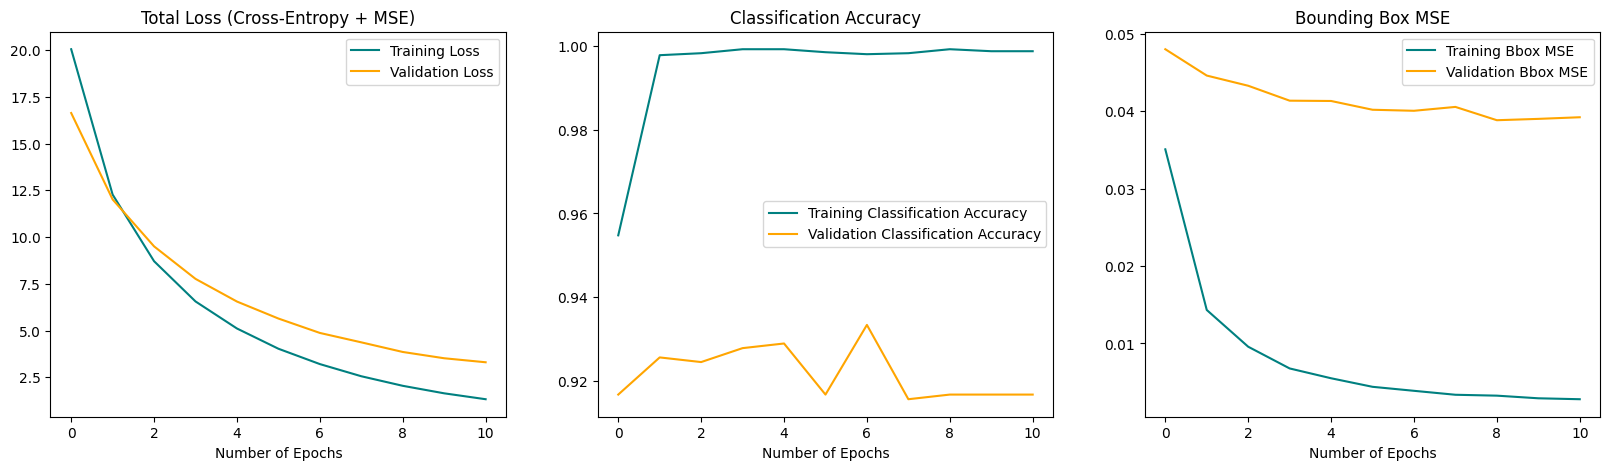

In [48]:
# Adjusting the plot based on actual keys and labels
fig, ax = plt.subplots(ncols=3, figsize=(20,5))

# First subplot for overall loss
ax[0].plot(history['loss'], color='teal', label='Training Loss')
ax[0].plot(history['val_loss'], color='orange', label='Validation Loss')
ax[0].set_title('Total Loss (Cross-Entropy + MSE)')
ax[0].set_xlabel('Number of Epochs')
ax[0].legend()

# Second subplot for classification accuracy
ax[1].plot(history['class_output_accuracy'], color='teal', label='Training Classification Accuracy')
ax[1].plot(history['val_class_output_accuracy'], color='orange', label='Validation Classification Accuracy')
ax[1].set_title('Classification Accuracy')
ax[1].set_xlabel('Number of Epochs')
ax[1].legend()

# Third subplot for regression loss
ax[2].plot(history['bbox_output_mse'], color='teal', label='Training Bbox MSE')
ax[2].plot(history['val_bbox_output_mse'], color='orange', label='Validation Bbox MSE')
ax[2].set_title('Bounding Box MSE')
ax[2].set_xlabel('Number of Epochs')
ax[2].legend()

plt.show()

### Display Bounding Box and Classification on Testing Data

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


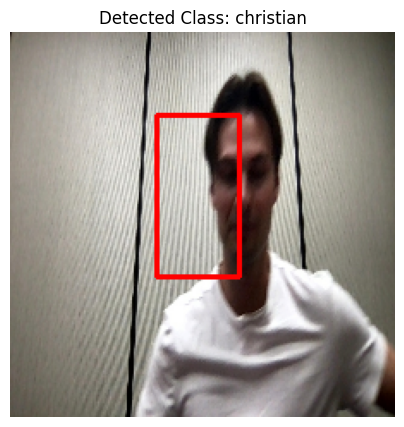

In [88]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
class_names = ['sharon', 'adi', 'christian', 'none']

test_data = test.as_numpy_iterator()
test_sample = test_data.next()
yhat = facetracker.predict(test_sample[0])
fig, ax = plt.subplots(figsize=(5, 5))  # Single subplot

# Assuming 'test_sample[0]' contains images and 'yhat' contains predictions
# Ensure there is at least one prediction and one test image
if len(test_sample[0]) > 0 and len(yhat[1]) > 0:
    sample_image = test_sample[0][0]  # First image
    sample_coords = yhat[1][0]       # First set of bounding box coordinates
    sample_image = np.array(sample_image).copy()
    class_probs = yhat[0][0]         # First set of class probabilities
    class_id = np.argmax(class_probs)
    max_prob = class_probs[class_id]
    
    if max_prob > 0.3:  # Change this threshold as needed
        x_min, y_min = np.multiply(sample_coords[:2], [224, 224]).astype(int)
        x_max, y_max = np.multiply(sample_coords[2:], [224, 224]).astype(int)
        cv2.rectangle(sample_image, (x_min, y_min), (x_max, y_max), (255, 0, 0), 2)

        # Optional: Draw label rectangle and text
        label_rect_start = (x_min, y_min - 30)
        label_rect_end = (x_min + 80, y_min)
        #cv2.rectangle(sample_image, label_rect_start, label_rect_end, (255, 0, 0), -1)
        #cv2.putText(sample_image, (x_min, y_min - 5), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)

    ax.imshow(sample_image)
    ax.set_title('Detected Class: ' + str(class_names[class_id]))
    ax.axis('off')

plt.show()


## Real Time Prediction using OpenCV

In [34]:
# Initializing the video capture
cap = cv2.VideoCapture(0)

class_names = ['sharon', 'adi', 'christian', 'none']  # List corresponding to the indices

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        print("Failed to grab frame")
        break

    rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    resized = tf.image.resize(rgb, (224, 224))
    
    # Predict using the model
    yhat = facetracker.predict(np.expand_dims(resized / 255.0, axis=0))
    sample_coords = yhat[1][0]  # Bounding box predictions - double index converts to column instead of vector
    class_probs = yhat[0][0]    # Class probabilities

    class_id = np.argmax(class_probs) #Returns index of class with the highest probability
    max_prob = class_probs[class_id] #Grabs corresponding probability value

    if max_prob > 0.3 and class_id != 3:  # Check for a significant probability and valid face
        
        #Rescaling normalized coordinates to match frame size
        x_min, y_min = np.multiply(sample_coords[:2], [frame.shape[1], frame.shape[0]]).astype(int)
        x_max, y_max = np.multiply(sample_coords[2:], [frame.shape[1], frame.shape[0]]).astype(int)

        # Draw the bounding box
        cv2.rectangle(frame, (x_min, y_min), (x_max, y_max), (0, 0, 255), 1) #Controls color of bounding box, 2 size

        # Draw label rectangle and text
        label_text = class_names[class_id]  # Get the class name using the class ID
        label_rect_start = (x_min, y_min - 30) #This sets the starting point of the rectangle 30 pixels above the upper boundary of the bounding box to avoid overlapping with it.
        label_rect_end = (x_min + 80, y_min)#This sets the ending point of the rectangle 80 pixels to the right of the starting point, creating a rectangle width of 80 pixels.
        cv2.rectangle(frame, label_rect_start, label_rect_end, (0, 0, 255), -1)
        cv2.putText(frame, label_text,(x_min, y_min - 5), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2) #text is placed slightly above the upper boundary of the bounding box (5 pixels above) 

    cv2.imshow('FaceTrack', frame)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━

In [ ]:
#22 -44